In [2]:
from sklearn.datasets import load_digits
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
digits = load_digits()
x = digits.data
y = digits.target
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)
classifier = DecisionTreeClassifier()
from sklearn.grid_search import GridSearchCV
parameters = {'criterion':["gini", "entropy"],'max_depth':np.arange(2,20),'min_samples_leaf':np.arange(1,20),'min_samples_split':np.arange(2,10),'max_features':np.arange(1,10)}
DTree = GridSearchCV(classifier, parameters)
y_score = DTree.fit(X_train, y_train).predict(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
roc_auc[1]

C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.88153846153846149

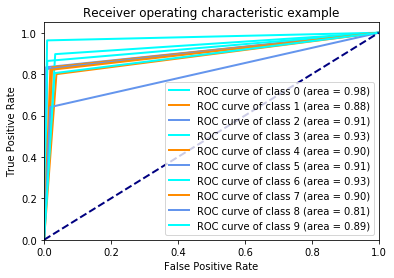

In [3]:
import matplotlib.pyplot as plt
from itertools import cycle
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [4]:
from sklearn.metrics import classification_report
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
print(classification_report(y_test, y_score))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.90      0.96      0.93        27
          1       0.70      0.80      0.75        35
          2       0.94      0.83      0.88        36
          3       0.70      0.90      0.79        29
          4       0.76      0.83      0.79        30
          5       0.92      0.82      0.87        40
          6       0.93      0.86      0.89        44
          7       0.84      0.82      0.83        39
          8       0.81      0.64      0.71        39
          9       0.77      0.80      0.79        41

avg / total       0.83      0.82      0.82       360




In [5]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test.argmax(axis=1), y_score.argmax(axis=1))
print(matrix)

[[26  0  0  0  0  0  1  0  0  0]
 [ 0 28  0  1  2  2  0  1  1  0]
 [ 1  1 30  1  0  0  0  1  1  1]
 [ 0  1  0 26  0  0  0  0  1  1]
 [ 1  1  0  0 25  0  0  1  1  1]
 [ 0  0  0  2  2 33  1  0  0  2]
 [ 0  3  0  0  2  1 38  0  0  0]
 [ 0  0  0  2  1  0  0 32  2  2]
 [ 0  6  0  2  1  0  1  1 25  3]
 [ 1  0  2  3  0  0  0  2  0 33]]


In [6]:
score = DTree.score(X_test, y_test)
print(score)

0.822222222222


In [7]:
DTree.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [8]:
DTree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=14,
            max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [10]:
DTree.best_score_

0.81419624217119